### EJERCICIO DE LOS SITIOS

#### AUTOR: Antonio Bravo Muñoz

#### DESCRIPCIÓN:

En el aula tenemos 15 sitios nada más. Cada persona tiene asignado un sitio. La primera en llegar es siempre Isabel, y el último en llegar es siempre Ramón. Cuando Isabel llega, se sienta donde le parece mejor, que puede ser su sitio o no. Cada nueva persona que llega intenta sentarse en su sitio correspondiente; pero si resulta que alguien lo ha ocupado, entonces se sienta en cualquier asiento libre que haya. Cuál es la probabilidad de que Ramón se siente en su sitio? Y si tenemos un aula con 100 personas y sitios, cambia la probabilidad?

Cada vez que se llena el aula es una tirada. La probabilidad puntual hay que estimarla usando 100 tiradas. Estas 100 tiradas configuran un experimento, y darán una probabilidad estimada dividiendo el número de veces que Ramón se ha sentado en su sitio, dividido por 100.



In [17]:
#Importación de los paquetes necesarios.
import numpy as np
import random
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
#Definición de la función de elección.

def eleccion(N):
    
    #Inicialización
    resultados_sitios=[]
    sitios_disponibles=list(range(N))
    
    #Cuando Isabel llega, se sienta en el sitio que le parece mejor, por lo que es un número aleatorio entre 1 y 15. 
    #Este sitio ya no está disponible, por lo que hay que eliminarlo de la lista de sitios disponibles (pop).
    sitio_isabel=random.randint(0, N-1)
    sitios_disponibles.pop(sitio_isabel)
    
    #A partir de este punto van llegando el resto de compañeros, lo simularemos con un bucle de 
    for i in range(0,N-1):
        #Si está disponible su sitio se sienta y se elimina ese sitio de la lista de sitios disponibles (pop).
        if i in sitios_disponibles:
            sitio_elegido=sitios_disponibles.index(i)
            sitios_disponibles.pop(sitio_elegido)
            #Rellenamos con 1, en la lista de resultados, el sitio disponible.
            resultados_sitios.append(1)
        #Si no está disponible se sienta en cualquier otro sitio
        else:
            #Aleatoriamente se escoge un sitio de los disponibles (random.choice) y se quita de la lista y se elimina de los sitios diponibles (pop)
            sitio_elegido=random.choice(sitios_disponibles)
            sitios_disponibles.pop(sitios_disponibles.index(sitio_elegido))
            #Rellenamos con 0, en la lista de resultados, el sitio disponible.
            resultados_sitios.append(0)
    #El sitio de Ramón es el que nos importa para calcular la probabilidad, por ello nos quedamos con el último elemento de la lista
    sitio_ramon=resultados_sitios[-1]
    return sitio_ramon

In [4]:
#Definimos la funcion experimento que calculará la probabilidad tras realizar 100 iteraciones
def experimento(iteraciones,numeroSitios):
    #Inicialización de variables
    prob=0
    ultimos_sitio=[]
    #Bucle de iteraciones
    for l in range(iteraciones):
        ultimos_sitio.append(eleccion(numeroSitios))
    #Cálculo de la probabilidad
    prob=sum(ultimos_sitio)/iteraciones
    return prob

In [5]:
#Simulación del experimento con 15 sitios
experimento(100,15)

0.57

In [6]:
#Simulación del experimento con 100 sitios
experimento(100,100)

0.54

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


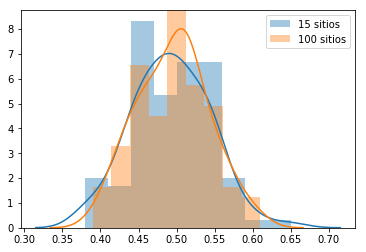

In [19]:
#Lanzamos las simulaciones con 15 sitios y 100 sitios
resultado_15=[experimento(100,15) for t in range(100)]
resultado_100=[experimento(100,100) for t in range(100)]

#Representación de la PDF
plt.figure("Test Plots")
sns.distplot(resultado_15,label="15 sitios")
sns.distplot(resultado_100,label="100 sitios")
plt.legend(['15 sitios', '100 sitios'])